In [ ]:
import math
math.log((9/14),2)

-0.6374299206152917

In [ ]:
((9/14)*math.log((9/14),2))+((5/14)*math.log((5/14),2))

-0.9402859586706309

In [ ]:
from scipy.stats import entropy
entropy([9/14,5/14],base=2)

0.940285958670631

In [ ]:
entropy([9/14,5/14],base=2)

0.940285958670631

In [ ]:
entropy([5/14,9/14],base=2)

0.940285958670631

In [ ]:
from scipy.stats import entropy
entropy([3/5,2/5], base=2)

0.9709505944546688

In [ ]:
entropy(1/4,3/4,base=2)

0.0

In [ ]:
entropy([1/4,3/4],base =2)

0.8112781244591328

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/iris.csv',header=None, names=['sepal length','sepal width','petal length','petal width','class'])
df.head()



,sepal length,sepal width,petal length,petal width,class
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [ ]:
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [ ]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df ['class']


In [ ]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [ ]:
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
from sklearn.tree import export_text

In [ ]:
result = export_text(dt,feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])

In [ ]:
print (result)

|--- petal width <= 5.50
|   |--- class: 0
|--- petal width >  5.50
|   |--- petal width <= 13.50
|   |   |--- petal length <= 25.50
|   |   |   |--- petal width <= 12.50
|   |   |   |   |--- class: 1
|   |   |   |--- petal width >  12.50
|   |   |   |   |--- class: 2
|   |   |--- petal length >  25.50
|   |   |   |--- petal width <= 11.50
|   |   |   |   |--- class: 2
|   |   |   |--- petal width >  11.50
|   |   |   |   |--- petal length <= 30.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length >  30.50
|   |   |   |   |   |--- class: 2
|   |--- petal width >  13.50
|   |   |--- sepal length <= 34.50
|   |   |   |--- petal length <= 24.50
|   |   |   |   |--- sepal width <= 10.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width >  10.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal length >  24.50
|   |   |   |   |--- class: 2
|   |   |--- sepal length >  34.50
|   |   |   |--- class: 3



In [ ]:
from sklearn import tree

[Text(0.5, 0.9166666666666666, 'x[3] <= 5.5\nentropy = 1.632\nsamples = 151\nvalue = [50.0, 50.0, 50.0, 1.0]'),
 Text(0.43333333333333335, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0, 0]'),
 Text(0.4666666666666667, 0.8333333333333333, 'True  '),
 Text(0.5666666666666667, 0.75, 'x[3] <= 13.5\nentropy = 1.07\nsamples = 101\nvalue = [0, 50, 50, 1]'),
 Text(0.5333333333333333, 0.8333333333333333, '  False'),
 Text(0.26666666666666666, 0.5833333333333334, 'x[2] <= 25.5\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5, 0]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[3] <= 12.5\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1, 0]'),
 Text(0.06666666666666667, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0, 0]'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.4, 0.4166666666666667, 'x[3] <= 11.5\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4, 0]'),
 Text(0.3333333333333333, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 T

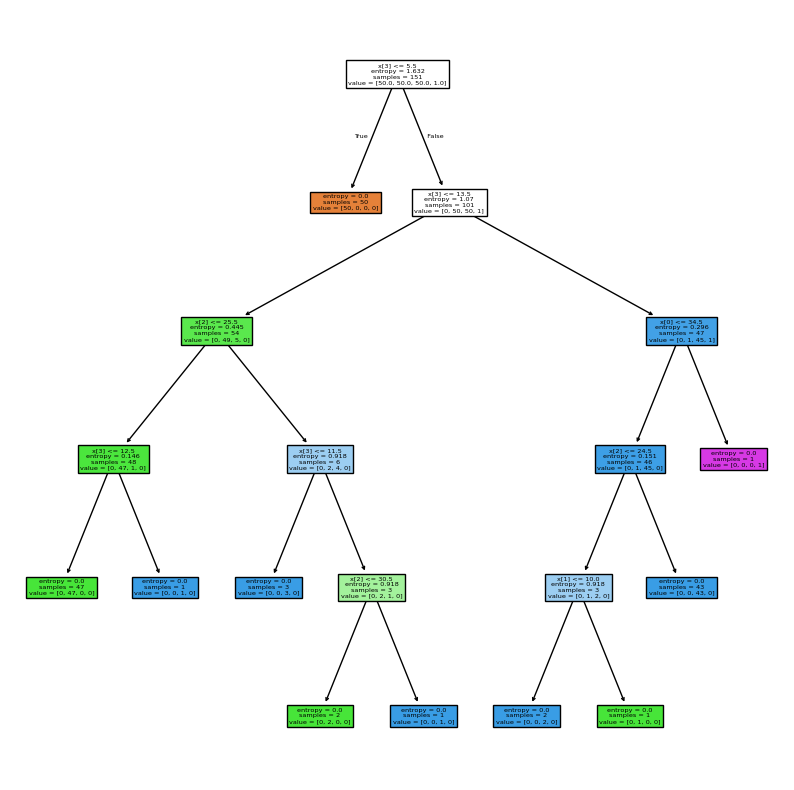

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dt,filled=True,ax=ax)

In [ ]:
dt.score(X,y)

1.0